# Importing required libraries and modules

In [1]:
import numpy as np
from matplotlib import pyplot as plt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add, BatchNormalization, Conv2D, MaxPooling2D, Convolution2D
from keras.utils import np_utils
from keras.optimizers import Adam
from keras.callbacks import LearningRateScheduler, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.regularizers import l2

from keras.datasets import mnist

%matplotlib inline

Using TensorFlow backend.


# Loading the data

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)


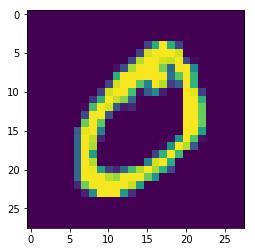

In [3]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[1])

The below blocks of code shows the preprocessing that is performed on the image data.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [0]:
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

### Image Normalization

Image Normalization helps in reducing overfitting of the model as well as makes all the image data in the same range. This will help in reducing the loss and there by increasing the accuracy of the model. 

### L2 Regularization

L2 regularization is used to reduce the overfitting of the model.


The main goal of bringing in Image Normalization and L2 Regularization is to improve the generalizm of the model. 

In [0]:
datagen = ImageDataGenerator(featurewise_center=True, 
                             featurewise_std_normalization=True)
datagen.fit(X_train)

In [0]:
# model = Sequential()
# model.add(Convolution2D(16, 3, 3, input_shape=(28,28,1)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Convolution2D(16, 1, 1))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Convolution2D(32, 3, 3))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Convolution2D(16, 1, 1))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(MaxPooling2D(pool_size=(2,2)))

# model.add(Convolution2D(32, 3, 3))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Convolution2D(16, 3, 3))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

# model.add(Convolution2D(10, 1, 1))
# model.add(BatchNormalization())
# model.add(Activation('relu'))

model=Sequential()
model.add(Conv2D(16, (3, 3), input_shape=(28,28,1), kernel_regularizer=l2(0.01))) #26
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(16, (3, 3), kernel_regularizer=l2(0.01))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(10, (1, 1), kernel_regularizer=l2(0.01))) #24
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))#11

model.add(Conv2D(8, (3, 3), kernel_regularizer=l2(0.01))) #12
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(16, (3, 3), kernel_regularizer=l2(0.01))) #10
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(16, (3, 3), kernel_regularizer=l2(0.01))) #8
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(16, (3, 3), kernel_regularizer=l2(0.01))) #6
model.add(BatchNormalization())
model.add(Activation('relu'))


model.add(Conv2D(10, (4, 4), kernel_regularizer=l2(0.01))) #4
model.add(BatchNormalization())


model.add(Flatten())
model.add(Activation('softmax'))

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 26, 26, 16)        160       
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 16)        64        
_________________________________________________________________
activation_8 (Activation)    (None, 26, 26, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 24, 24, 16)        2320      
_________________________________________________________________
batch_normalization_9 (Batch (None, 24, 24, 16)        64        
_________________________________________________________________
activation_9 (Activation)    (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 10)        170       
__________

Creating a filepath to store the best model. This will help us in figuring out which are the different classes of image which are getting misclassified.

In [0]:
# from keras import backend as K

# def custom_loss(lambd):
#     w2=0
#     for i in range(len(model.layers)):
#       if len(model.layers[i].get_weights())>0:
#         t=np.sum(model.layers[i].get_weights()[0]*model.layers[i].get_weights()[0])
#         w2=w2+t
#     w2=w2*(lambd/(2*X_train.shape[0]))
#     return w2

In [0]:
# def loss_l2(y_true,y_pred):
#   return K.categorical_crossentropy(y_true,y_pred)+custom_loss(lambd)

In [0]:
# lambd=0.01
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
batch_size = 32
filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
model_checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')

In [0]:
def scheduler(epoch, lr):
    return round(0.003 * 1/(1 + 0.319 * epoch), 10)

In [22]:
history = model.fit_generator(datagen.flow(X_train, Y_train, batch_size=32),
                              steps_per_epoch = X_train.shape[0] // batch_size,
                              epochs=40, verbose=1, 
                              validation_data=(X_test, Y_test),
                              callbacks=[LearningRateScheduler(scheduler, verbose=1), model_checkpoint])

Epoch 1/40

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
1875/1875 [==============================] - 43s 23ms/step - loss: 0.5239 - acc: 0.9337 - val_loss: 2.3833 - val_acc: 0.3906

Epoch 00001: val_acc improved from -inf to 0.39060, saving model to weights-improvement-01-0.39.hdf5
Epoch 2/40

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2826 - acc: 0.9570 - val_loss: 1.7225 - val_acc: 0.4314

Epoch 00002: val_acc improved from 0.39060 to 0.43140, saving model to weights-improvement-02-0.43.hdf5
Epoch 3/40

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
1875/1875 [==============================] - 41s 22ms/step - loss: 0.2386 - acc: 0.9631 - val_loss: 1.2356 - val_acc: 0.6087

Epoch 00003: val_acc improved from 0.43140 to 0.60870, saving model to weights-improvement-03-0.61.hdf5
Epoch 4/40

Epoch 00004: LearningRateScheduler setting learnin

In [23]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.4015700730800629, 0.8917]


## Loading the model weights back to the model

In [24]:
!ls

sample_data			  weights-improvement-04-0.74.hdf5
weights-improvement-01-0.11.hdf5  weights-improvement-05-0.74.hdf5
weights-improvement-01-0.39.hdf5  weights-improvement-06-0.85.hdf5
weights-improvement-02-0.43.hdf5  weights-improvement-07-0.86.hdf5
weights-improvement-03-0.11.hdf5  weights-improvement-10-0.91.hdf5
weights-improvement-03-0.61.hdf5  weights-improvement-13-0.94.hdf5


In [0]:
model.load_weights("weights-improvement-13-0.94.hdf5")

In [27]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

[0.2673904165506363, 0.9437]


In [0]:
prediction = model.predict_classes(X_test)

### Data study to find out misclassified images.

In [0]:
misclassified = []
for i in range(len(Y_test)):
    if y_test[i] != prediction[i]:
        misclassified.append((y_test[i], prediction[i], i))

In [30]:
len(misclassified)

563

In [0]:
misclassified_images = []
misclassified_classes = []
actual_classes = []

for actual_val, pred_val, i in misclassified:
    misclassified_images.append(X_test[i])
    actual_classes.append(actual_val)
    misclassified_classes.append(pred_val)

In [32]:
test_images = np.array(misclassified_images)[0:25]
test_images.shape

(25, 28, 28, 1)

## Plot of 25 images which are misclassified

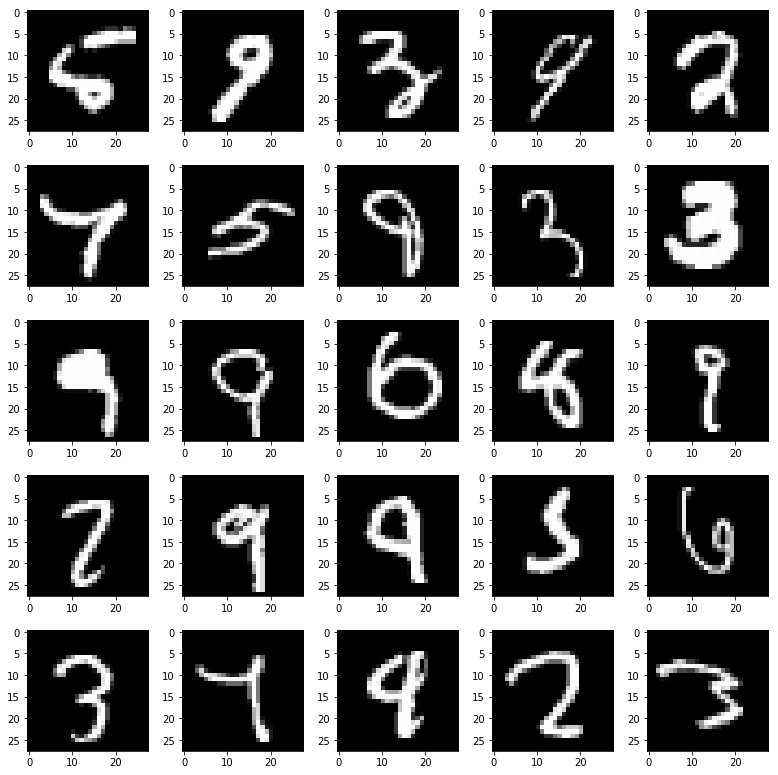

In [33]:
fig, ax = plt.subplots(5, 5, figsize = (12, 12))

fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
i = 0

for row in ax:
	for col in row:
		if i < 25:
			col.imshow(test_images[i].reshape(28,28), cmap='gray')
			i += 1

The below shows the actual class value and the predicted class value. 

In [34]:
print("Actual Classes")
for i in range(25):
    if i % 5 != 0:
        print(actual_classes[i], end=' ')
    else:
        print('\n')
        print(actual_classes[i], end=' ')
        
print('\n\n')        

print("Misclassified Classes")
for i in range(25):
    if i % 5 != 0:
        print(misclassified_classes[i], end=' ')
    else:
        print('\n')
        print(misclassified_classes[i], end=' ')

Actual Classes


5 9 3 9 2 

7 5 9 3 3 

9 9 6 8 9 

2 9 9 5 6 

3 7 9 2 3 


Misclassified Classes


6 7 4 4 7 

4 6 4 1 0 

4 7 0 6 7 

7 4 4 1 4 

7 1 4 7 7 